# Assignment 1

## Introduction

The data in this markdown is from a 2 x 2 repeated measures design. The first factor is ‘prime’ which has 2 levels ‘positive’ or ‘negative’, and the second factor is ‘target’ which also had two levels ‘positive’ or ‘negative’. 148 participants responded to a target image that was either positive or negative in valence. The target was preceded by a prime that was either also positive or negative in valence. The dependent variable is response time measured in milliseconds. 

This markdown answers two main questions:
1. Did people respond faster to a positive image following a positive prime (relative to following a negative prime)
2. Did people respond faster to a negative image following a negative prime (relative to following a positive prime).

The python code is condensed into three distinct functions.
1. my_data = read_my_data("python_assignment_1.csv") - This function reads in the .csv data file.
2. run_my_anova(my_data) - This function prints the descriptive statistics, produce a visualisation of the data, and performs (and reports the results of) the appropriate repeated measures ANOVA 
3. pairwise_comparisons(my_data) - This function performs and reports the appropriate pairwise comparisons to allow interpretation of the ANOVA

## Function 1 - Read in and wrangle the data

This first function reads in and wrangles the data so it is appropriate for further analysis and visualisation. This data shows two problems in need of fixing at this stage. 

1. The column heads are not capatalised which although not a terminal problem can lead to aesthetically underwhelming visualisations. 
2. The values for each of the independent variables also repeats the variable they represent and as such the values need renaming.

This first line of code uses an import as statement. Import statements import code from one module into another program. The as statement is followed by the name you wish the imported code to be saved under. In this case the Pandas library has been saved as pd. Pd is chosen to shorten the name making it easier to call in subsuquent code. The pandas library is an open source data analysis and manipulation library with multiple functions used in this markdown. Specifically for function 1 the pd.read_csv function is applied. This function allows the comma-separated values file that holds the data to be read into a data frame.

In [7]:
import pandas as pd

Below is the function created to read in the data.

Def is a keyword within the Python language that indicates the opening of a new user defined function for within the program. It is followed by the name of the new function which is also identifiable by its blue colour. The (x) that is conjoined to the function is the indexing operator in Python. The x represents whatever data is indexed by the user. As noted the pd.read_csv function is applied to read the data csv file into a data frame. Note that wherever x appears within the function the user defined index is applied. For example the pd.read_csv function is applied to 'x' which means whatever data is indexed is read here. This data is then saved under the name my_data by stating the name followed by the equals operator and then finally the function. Finally return which is another key word in Python is applied. Return statements sends stated values back to the program before exiting the function and intiating python to run the rest of the script. In this case the read in data is returned under the name my_data.

In [8]:
def read_my_data(x):
    my_data = pd.read_csv(x)
    return my_data

In [9]:
my_data=read_my_data("python_assignment_1.csv")

## Function 2 - Data Wrangling

Till the data was read in it could not be determined if any data cleaning needed to take place. To look at the data the head function has been applied to the data. This function again originates from the pandas library and returns the first five rows of the data frame. This creates a snapshot of the overall data set.

In [10]:
my_data.head()

,participant,prime,target,rt
0,1,positiveprime,positivetarget,1502
1,2,positiveprime,positivetarget,1535
2,3,positiveprime,positivetarget,1563
3,4,positiveprime,positivetarget,1492
4,5,positiveprime,positivetarget,1560


This data shows two problems in need of fixing to clean the data for visualisation and analysis to take place. 
1. The column heads are not capatalised which although not a terminal problem can lead to aesthetically underwhelming visualisations. 
2. The values for each of the independent variables also repeats the variable they represent and as such the values need renaming.

Again, a function has been created to fix this problem. The keyword def is applied followed by the name of the function and then finally the index operator. 

The first line of code fixes the captalisation problem outlined. The columns of the item (x) will be overwrote by the code after the equals operator. This code first identifies the columns of (x). Next the str function is called to identify the string headers of each column. Finally, the title function is used which takes the already idetified string information and capatalises the first letter of each word. 

The second line of code replaces the inapropriate value names and renames them with more appropriate user defined names. To do this the replace function is applied which replaces a specified phrase with another specified phrase. The first set of phrases outlined are those which will be replaced. Each is seperated by a comma and its own set of speech marks. The second set of phrases replace those which have been dropped. Importantly the phrases are inputed in the order they will replace. For example 'Negative' is the second phrase and so will replace the second dropped phrase which is 'negativeprime'. Finally these changes are saved back onto the 'my_data' data frame. This data frame is then returned and the function is completed. 

In [11]:
def wrangle_data(x):
    x.columns = x.columns.str.title()
    my_data = x.replace(['positiveprime', 'negativeprime', 'positivetarget', 'negativetarget'], 
                    ['Positive', 'Negative', 'Positive', 'Negative'])
    return my_data

The data is now appropriately wrangled and can be used for visualisation and analysis.

## Function 3 - Data Visualisation and Analysis

A number of new libraries have been loaded using import statements to facilitate the visualisation and analysis of the data. Numpy provides the mathematical functions needed to create the descriptive statistics. Seaborn is a data visualisation library that provides a lot of aesthetic flexibility. 

The next two libraries are called differently to the previous packages. Instead of just the keyword import first the from keyword is applied. This type of statement allows a specific function of a package to be taken from a module and then saved under a name in the local scope.  Within the stats model package is a specific set of functions for factorplots which are required. Using the statement below the specific functions required are identified then saved to a name that represents their use. A similar process is applied to gain the factorial anova function from the stats model package also. Again the specific code is saved under an appropriate name. 

The final library imported is the matplotlib.pyplot library. This library is also used for data visualisation.

In [12]:
import numpy as np
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.anova import AnovaRM
import matplotlib.pyplot as plt

This function has multiple requirements.

1. Produce and print the descriptive statistics 
2. Produce a visualisation of the data 
3. Perform and report results of the ANOVA

The requirements of this function have been adressed in the order they have just been presented in. A defintion statement is opened followed by the name of the function and the index operator.

The first code block creates and prints the descriptive statistics for this experiment. The current research question is interested with how the interaction between Prime and Target effect Rt. As a result the descriptives must also show the interaction between these variables on Rt. To do this the descriptive statistics need to be grouped by two variables. 

The first step to do this is to create a new data frame grouped by the two IVs. This can be done using the groupby function. The data is first called using the index operator and then the groupby function is applied. This function will split the data based on the group the values belong to. Within the brackets are the two grouping variables which as discussed are Prime and Target. This new grouped data frame is saved under the clear data label grouped_data. 

The next line of code sets the parameters and creates the descriptive statistics. First the newly created grouped data frame is called and specfically the response time variable is isolated. This variable is isolated as it is the variable that the descriptive statistics will be made on. Next the aggregate function has been applied followed by the specfic aggregation functions. An aggregate function uses the values in the data frame that are grouped to create a single summary value. In this case the required statistics are median, standard deviation and mean which are all called via functions under their requisite name from the NumpPy library. Finally, the reset.index function is applied. This function resets the grouping which will be useful in the next part of the function when it comes to creating a data visualisation. It also creates a better looking table.The final line of code for the descriptive statistics just makes some minor formatting changes. Similar to when data wrangling the table created has inconsistencies in its captalisation. To fix this the same applicaiton of the  str and title function is done. Finally the descriptives are printed using the print function.

The second code block creates a graph that takes the means of each group and plots them. The aim of this plot is to visually communicate the mean differences between the groups and give viewers an idea about the effects that are in the data.

The first step to create this plot is the creation of a data frame that represents the group means. To do this the grouped_data that was created in the previous block of code is called and the variable that the mean will be applied to is identified within the brackets. After idetifying the variable the mean function is applied. The data frame that results from the parameters set is saved as a new dataframe called group_means. 

In the next line of code the data needs to be wrangled slightly to make it appropriate for this type of visualisation. Here the data frame is called as a panda data frame using the pd.DataFrame function and then the groupings are reset using the reset_index function. These changes are saved as the data frame data_to_plot. The next code line creates and defines the parameters of the interaction plot. The interaction_plot function that had been imported from the stats model package is called first. This indicates the type of graph and default aesthetic of the graph. Within the brackets is the basic parameters of the graph. First the X axis is defined as being the factor Target. The trace is the other factor in this experiment (prime) and will be used to group the fill colour of the graph. The response is the y axis of the graph and as such is set to Rt. Finally the colours of the fill are set and the markers that define group identification are set.

Although the plot at this point is serviceable some minor aesthetic tweaks are made on the next five lines. These changes are made using matplotlib.pyplot due to the aesthetic flexibility the package provides. The first two lines change the x and y labels of the plot. The functions are syntactically the same first the package is called followed by either x or y label and then the required label in speech marks. The next line changes the title again using an identical sytax except the function is called title. The final aesthetic change is to scale the margins as required for clarity using the margins function. Once all these changes are made the graph is then shown using the plt.show function followed by the plot name.

The next plot created is a violin plot. The rationale for this plot is that although the mean has been visualised in previous plot a lot of the other descriptive statistics are omitted. This plot aims to create a more descriptive visualisation that gives a viewer more information about the data. The violin plot was specifically picked as it gives a visual indication of the median, interquartile range and the distribution of the data.

To create this plot the seaborn library was used. The sns.catplot function was called which specifically shows the relationship between a numerical and one or more categorical variables using one of several visual representations. Within the brackets first the x and y axis variables are assigned. To avoid confusion target is again mapped to the x axis and Rt is assigned to the y axis. To visualise the interaction again the colour is grouped by Prime group using the hue = function. The data is then set as the user defined index operator. The the catplot function has the functionality to create different plots so the kind is specified as violin to get the desired plot. Finally the set function is applied after the brackets to give the plot a new title. The plot is then shown using the plt.show function.

The third and final code block runs the ANOVA that has been developed. This block aims to determine whether a relationship exists between any of the conditions within the experiment.

The Anova models is built as follows. The AnovaRM function is firsted called from the statmodel package. This function allows the building of a repeated measure factorial ANOVA which is what required given the experimental design. After calling the function the model parameters are set. First the data is defined as the index operator. Next the outcome variable is defined as Rt. Then the two factorial grouping variables are entered; Prime and Target. The subjects then are set as the participant variable from the data frame. Finally the fit function is applied to fit this model to our data frame. The output of this model is then printed using the print function.

In [13]:
def run_my_anova(x):
    
    grouped_data = x.groupby(['Prime', 'Target'])
    descr = grouped_data['Rt'].aggregate([np.median, np.std, np.mean]).reset_index()
    descr.columns = descr.columns.str.title()
    print(descr)
    
    group_means = grouped_data['Rt'].mean()
    data_to_plot = pd.DataFrame(group_means).reset_index()
    ip = interaction_plot(x=data_to_plot['Target'], trace=data_to_plot['Prime'], 
                                           response=data_to_plot['Rt'], colors=['red', 'blue'], 
                                           markers=['D', '^'])
    plt.xlabel('Target')
    plt.ylabel('RT (ms.)')
    plt.title('Examining the interaction between Prime and Target on mean RT')
    plt.margins(.5, 1)
    plt.show(ip)
    
    violin = sns.catplot(x='Target', y='Rt', 
            hue='Prime', data=x, 
                kind='violin').set(title='Examining the interaction between Prime and Target on RT')
    plt.show(violin)
    
    factorial_model = AnovaRM(data=x, depvar='Rt', within=['Prime', 'Target'], subject='Participant').fit()
    print(factorial_model)

## Function 4 - Post-Hoc Testing

The fourth and final function applies post hoc testing to the ANOVA model created from the previous function. The aim of this function is to perform and report the pairwise comparisons made on the data to allow interpretation of the ANOVA. When deciding what post hoc testing to apply the first consideration is what is the question. Here we have two:
1. Did people respond faster to a positive image following a positive prime (relative to following a negative prime)
2. Did people respond faster to a negative image following a negative prime (relative to following a positive prime).

With these two questions in mind the choice was made to do two t-tests. The first t-test will compare the difference between the Positive Prime and Target group Rt against the Negative Prime and Positive target group Rt. The second t test will compare the difference between the Negative Prime and Target group Rt against the Positive Prime and Positive target group Rt. The results of these t-tests will answer both questions. The only caution that must be taken when interpreting the results is to adopt a critical alpha level of .025 to control for the familywise error associated with running the two key tests.

With these aims in mind a from/import statement has been created to take the stats module from the scipy module and apply it to this program. This module provides a number of statistical tests including the functionality to carry out pairwise comparisons which is required here.

In [14]:
from scipy import stats

Again a defintion statement is opened followed by the name of the function and the index operator. To run the t-tests. First the data frame has beeen filtered and then new variables for each of the condition combinations of interest have been created. To do this a boolean index has been created corresponding to specific IV combinations. For example the first line of code created an index for the positive prime and positive target condition. To do this the index operator is first called followed by the first IV (prime). Next a double equals operator is applied which means equals however the use of a double is appropriate when dealing with true/false values like those in a boolean index. The level of prime is then identified as Positive. Next an and operator is applied followed by a similar sytax to that just discussed however this time it is for our Target factor and positive level. To map this index onto the new variable appropriately a name for the new variable is defined followed by an equals operator. Next the index operator is stated followed by the previously created index and then Rt is called. These two lines of code are repeated three other times with just the levels of the factors changed to create the required condition.

From this four variables have been created which can then be applied to a t-test. To run a t-test the stats.ttest_rel function from the stats package in sci py can be applied. The only other requirement is to define the variables that this statistical test will be applied to. In the case of the question at present the pairs are PP & NP which is Positive Prime & Target compared to Negative Prime Positive Target and NN, PN which is Negative Prime & Target compared to Positive Prime Negative Target.

Finally a return statement is created to return the result of both these tests.

In [15]:
def pairwise_comparison(x):
    index = (x['Prime']=='Positive') & (x['Target']=='Positive')
    PP = x[index]['Rt']
    index = (x['Prime']=='Negative') & (x['Target']=='Positive')
    NP = x[index]['Rt']
    index = (x['Prime']=='Positive') & (x['Target']=='Negative')
    PN = x[index]['Rt']
    index = (x['Prime']=='Negative') & (x['Target']=='Negative')
    NN = x[index]['Rt']
    TT_PPNP= stats.ttest_rel(PP, NP)
    TT_NNPN= stats.ttest_rel(NN, PN)
    return TT_PPNP, TT_NNPN

## Main Script

The first function of my main script has successfully read in the experimental data and saved it under the name my_data.

In [16]:
my_data = read_my_data("python_assignment_1.csv")

The second function has taken the my_data data frame and wrangled it by altering value names and capitalising column names.

In [17]:
my_data = wrangle_data(my_data)

The third function has generated descriptive statistics, two visualisations of the data and then displayed the output of the ANOVA model created.

The descriptive statistics show that the means of each group appear to vary. As dicussed there is theoretical value in making the two comparisons that the questions pertain too. Comparing the Positive Prime & Target mean to the Negative Prime Positive Target condition mean it is observed that reaction times to first group is 1550.5 which is 12 ms quicker than the latter group. The second comparison is between the Negative Prime & Target and the Positive Prime Negative Target group mean it is observed that reaction times to first group is 1550.5 which is 20 ms quicker than the latter group. Whether these differences are statistically significant is considered later, however, it is a clear indication that these groups response times differ.

To visualise the means that have just been discussed and create a clear comparision between them an interaction plot has been generated. This plot is visually clear and communicates to a viewer the key information that was extracted from the descriptive statistic table. It does, however, only represent the mean column in the data and as such a lot of the information generated from the data is lost.

The next visualisation accounts for the lack of information highlighted in the previous group. The violin plot used displays five values: the minimum value, the interquartile range, the median and the maximum value. It also displays the distribution of the data in each group. Again comparisons can be made but in this graph the values that are available for comparison are more plentiful. Arguably the success of both this visualisation and the previous one is their generation together. Between the two graphs a viewer can understand key features of the data by group such as mean, median and standard deviation. 

Finally the ANOVA output has been generated. The key information from this graph is the F value and the p value. Both values indicate whether and the significance of variance between groups in this case. As seen in this output table both the variable Prime and Target in isolation do not provide significant difference; denoted by p values over the alpha level of 0.05. The final line of the output shows that signficanct differences are within the interaction between Prime and Target  (F (1,147) = 17.18, p < .001). From the ANOVA output we cannot conclude where the differences lie and as such further post hoc testing is required.

      Prime    Target  Median        Std         Mean
0  Negative  Negative  1550.5  52.382700  1547.256757
1  Negative  Positive  1562.0  50.468400  1562.648649
2  Positive  Negative  1570.5  54.016737  1566.959459
3  Positive  Positive  1550.5  44.879072  1547.391892


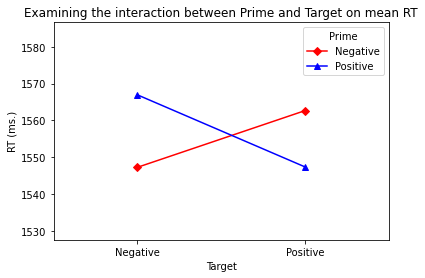

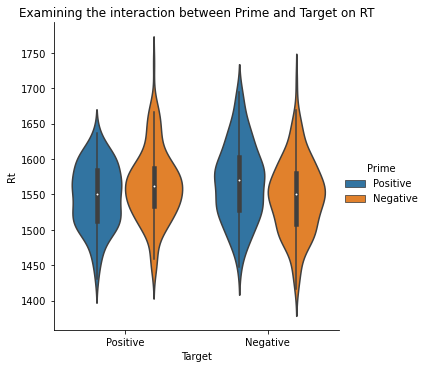

                   Anova
             F Value Num DF  Den DF  Pr > F
-------------------------------------------
Prime         0.3132 1.0000 147.0000 0.5766
Target        0.2365 1.0000 147.0000 0.6275
Prime:Target 17.1778 1.0000 147.0000 0.0001



In [18]:
run_my_anova(my_data)

The pairwise comparisons have been carried out by doing two t-tests as discussed when defining the formula. The first t-test concerns the comparision between the Positive Prime & Target condition and the Negative Prime Positive Target. The second comparison is between the Positive Prime Negative Target condition compared to Negative Prime & Target condition. One note before interpreting these t-tests is a reiteration that a critical alpha level of .025 has been adopted to control for the familywise error associated with running the two key tests. 

The first T-test found that the Positive Prime and Target group had signficantly better response times than the Negative Prime Positive Target group (t = -2.91, p = <0.01). 

The second T-test found that the Negative Prime and Target group had signficantly better response times than the Negative Prime Positive Target group (t = -3.13, p = <0.01). 

In [19]:
pairwise_comparison(my_data)

(Ttest_relResult(statistic=-2.906391854871503, pvalue=0.00422249196356647),
 Ttest_relResult(statistic=-3.1321734668224033, pvalue=0.0020943602880594543))

## Conclusion

From this markdown both questions that were intially set out can be answered.
1. Yes people did respond faster to a positive image following a positive prime (relative to following a negative prime) (t = -2.91, p = <0.01).
2. Yes people did respond faster to a negative image following a negative prime (relative to following a positive prime) (t = -3.13, p = <0.01). 